# CIFAR10 Classification

## Import Packages

In [1]:
import sys
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### Data Preparation
Use CIFAR10 handwriting dataset

In [2]:
cifar10 = tf.keras.datasets.cifar10

Prepare data for training

In [3]:
# train / test split
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# minmax normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


# Compile and Train neural network

## CNN Modeling
Create a convolutional neural network

### Goal

Improve the provided basic CNN model and achieve CIFAR-10 **test accuracy ≥ 75%**.


Modify the network architecture!

**모델 개선점**
1. Conv 층을 블록당 2개로 변경
2. Batch Normalization 추가
3. Dropout 비율 변경
4. Dense층 감소
5. Padding="same" 추가

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(32,32,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
''' 원래 모델
model = tf.keras.models.Sequential([

    # Convolutional layer. Learn 64 filters using a 3x3 kernel
    tf.keras.layers.Conv2D(
        64, (3, 3), activation="relu", input_shape=(32, 32, 3)
    ),
    # Max-pooling layer, using 2x2 pool size
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.5),

    # Convolutional layer. Learn 128 filters using a 3x3 kernel
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    # Max-pooling layer, using 2x2 pool size
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.5),

    # Convolutional layer. Learn 246 filters using a 3x3 kernel
    tf.keras.layers.Conv2D(256, (3, 3), activation="relu"),
    # Max-pooling layer, using 2x2 pool size
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.5),

    # Flatten units
    tf.keras.layers.Flatten(),

    # Add a hidden layer with dropout
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    # Add a hidden layer with dropout
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    # Add an output layer with output units for all 10 digits
    tf.keras.layers.Dense(10, activation="softmax")
])'''

'\nmodel = tf.keras.models.Sequential([\n\n    # Convolutional layer. Learn 64 filters using a 3x3 kernel\n    tf.keras.layers.Conv2D(\n        64, (3, 3), activation="relu", input_shape=(32, 32, 3)\n    ),\n    # Max-pooling layer, using 2x2 pool size\n    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),\n    tf.keras.layers.Dropout(0.5),\n\n    # Convolutional layer. Learn 128 filters using a 3x3 kernel\n    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),\n    # Max-pooling layer, using 2x2 pool size\n    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),\n    tf.keras.layers.Dropout(0.5),\n\n    # Convolutional layer. Learn 246 filters using a 3x3 kernel\n    tf.keras.layers.Conv2D(256, (3, 3), activation="relu"),\n    # Max-pooling layer, using 2x2 pool size\n    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),\n    tf.keras.layers.Dropout(0.5),\n\n    # Flatten units\n    tf.keras.layers.Flatten(),\n\n    # Add a hidden layer with dropout\n    tf.keras.layers.Dense(1024, activa

# Compile and Train neural network

In [6]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4667 - loss: 1.6304
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6878 - loss: 0.8923
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7239 - loss: 0.7999
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7725 - loss: 0.6458
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8096 - loss: 0.5439
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8367 - loss: 0.4669
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8744 - loss: 0.3634
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8899 - loss: 0.3176
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9047 - loss: 0.2679
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9212 - loss: 0.2232


## Evaluate neural network performance


In [7]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 2s - 8ms/step - accuracy: 0.7832 - loss: 0.7504


[0.7503634095191956, 0.7832000255584717]

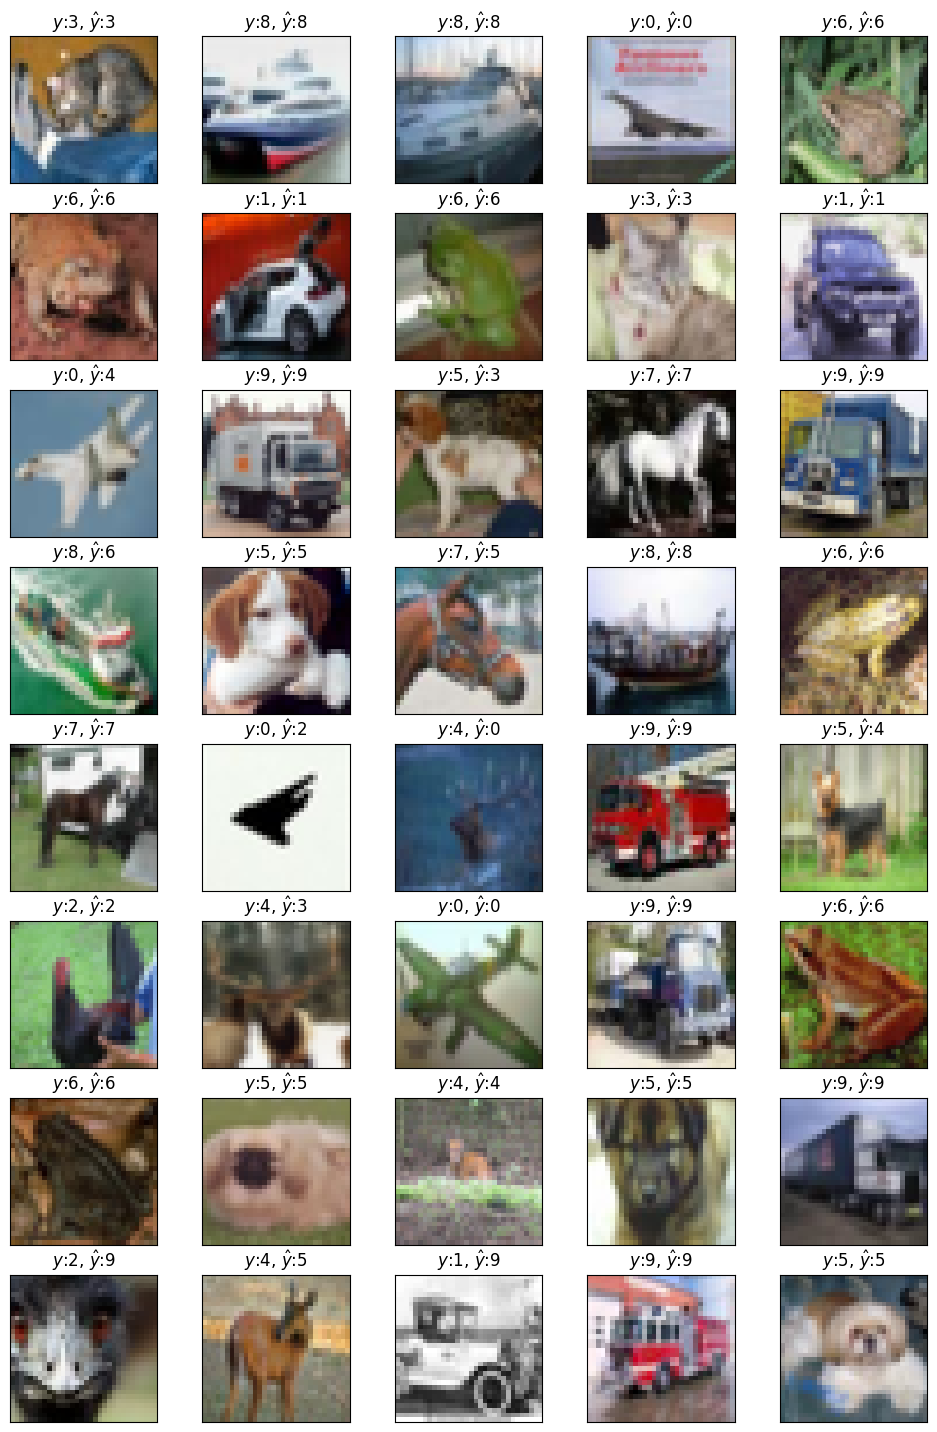

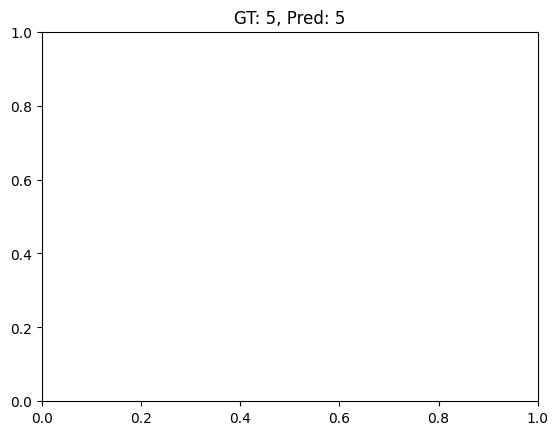

In [8]:
prob = model.predict(x_test[0:40], verbose=0)
pred = tf.argmax(prob, axis=1)

fig = plt.figure(figsize=(12, 18))
for i in range(40):
    subplot = fig.add_subplot(8, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    string = r'$\hat{y}$'
    subplot.set_title(f'$y$:{tf.argmax(y_test[i])}, {string}:{pred[i].numpy()}')
    subplot.imshow(tf.squeeze(x_test[i]))
plt.show()
true_label = tf.argmax(y_test[i]).numpy()
pred_label = pred[i].numpy()
plt.title(f"GT: {true_label}, Pred: {pred_label}")
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

In [9]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.7832000255584717
